### Experiment 1(a)

In [14]:
pip install librosa numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


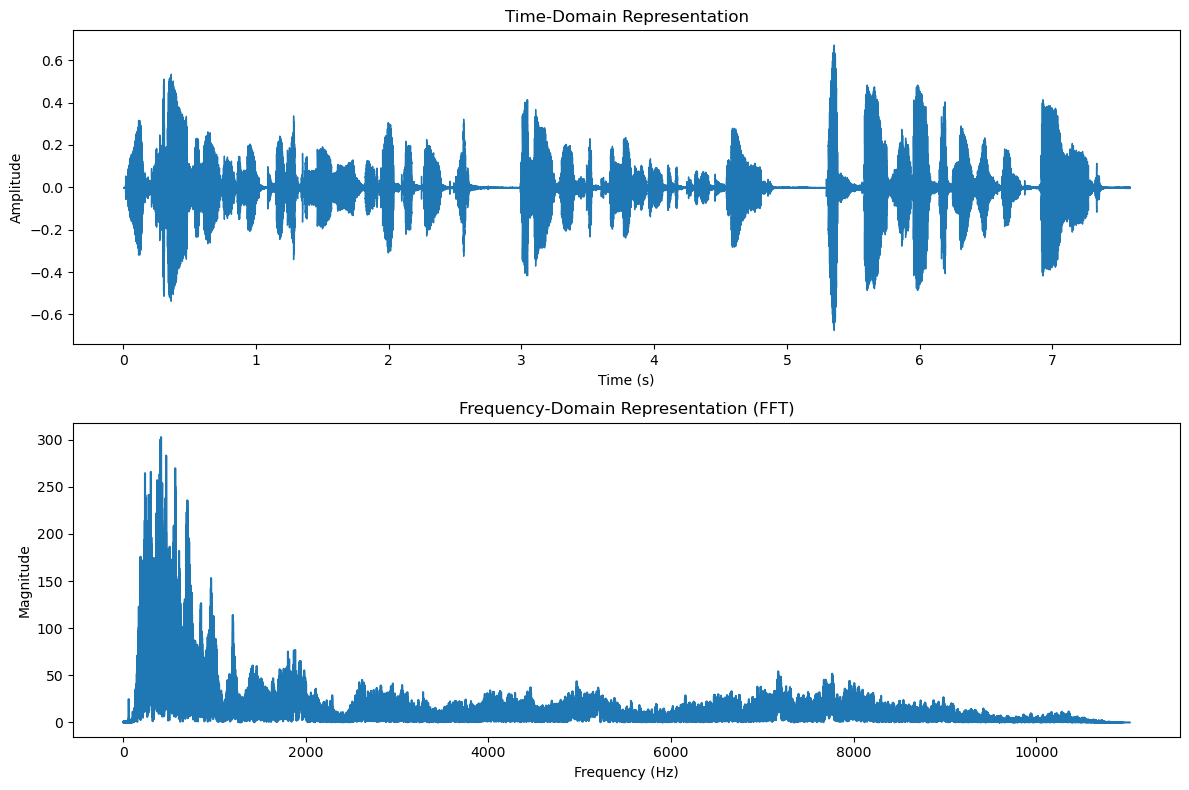

In [20]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample

# Step 1: Load a speech waveform
file_path = "LJ037-0171 (1).wav" 
signal, sample_rate = librosa.load(file_path, sr=None)

# Step 2: Apply FFT
fft_result = np.fft.fft(signal)
magnitude_spectrum = np.abs(fft_result)
frequency_axis = np.linspace(0, sample_rate, len(magnitude_spectrum))

# Step 3: Plot time-domain and frequency-domain representations
plt.figure(figsize=(12, 8))

# Time-domain plot
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Time-Domain Representation")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(frequency_axis[:len(frequency_axis)//2], magnitude_spectrum[:len(magnitude_spectrum)//2])
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

### Experiment 1(B)

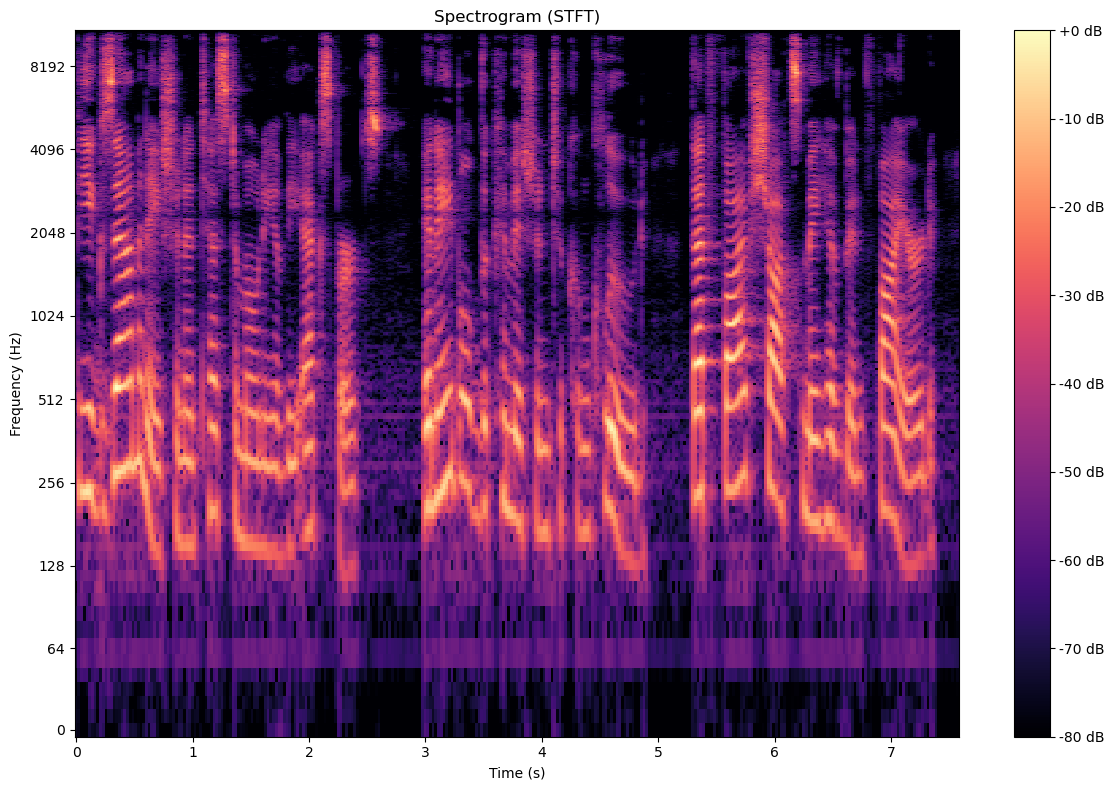

In [22]:
# Step 1: Compute STFT
stft_result = librosa.stft(signal)
stft_magnitude = np.abs(stft_result)

# Step 2: Convert amplitude spectrum to decibels
stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

# Step 3: Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(stft_db, sr=sample_rate, x_axis="time", y_axis="log", hop_length=512)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

### Experiment 2

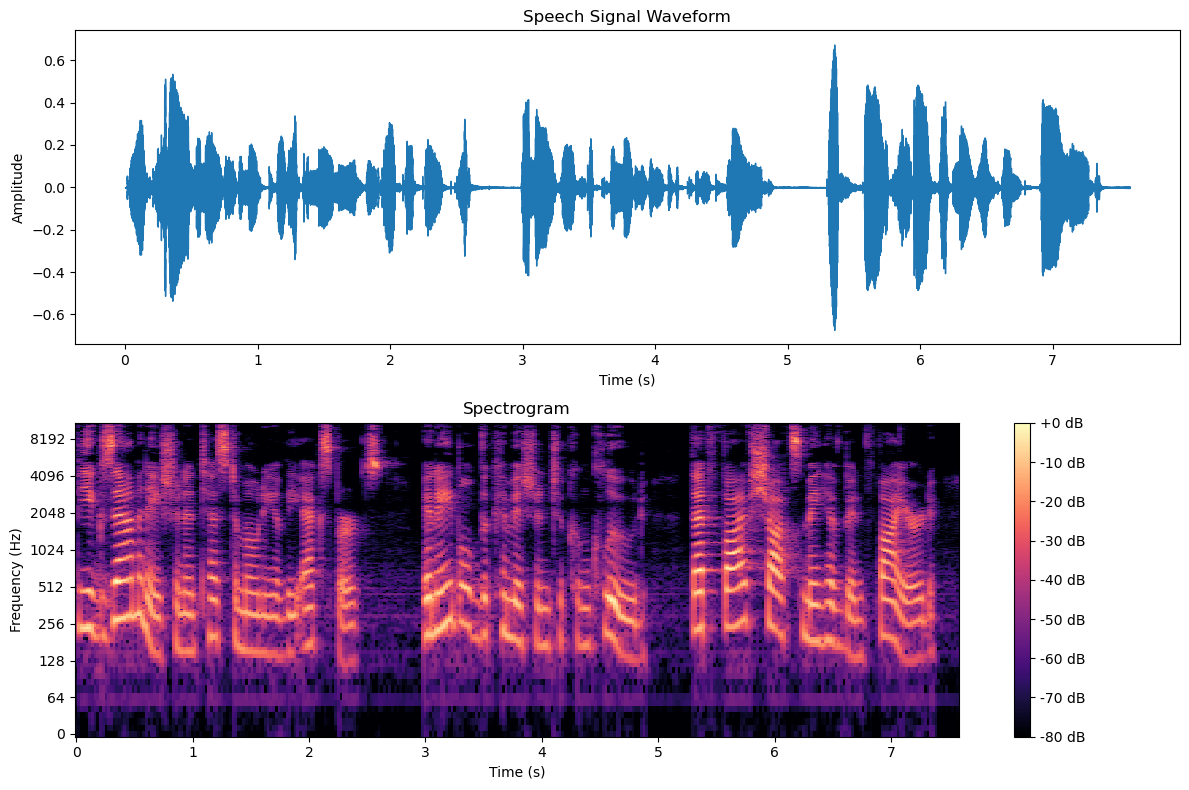

Energy Ratio (Vowels/Fricatives): 23.70


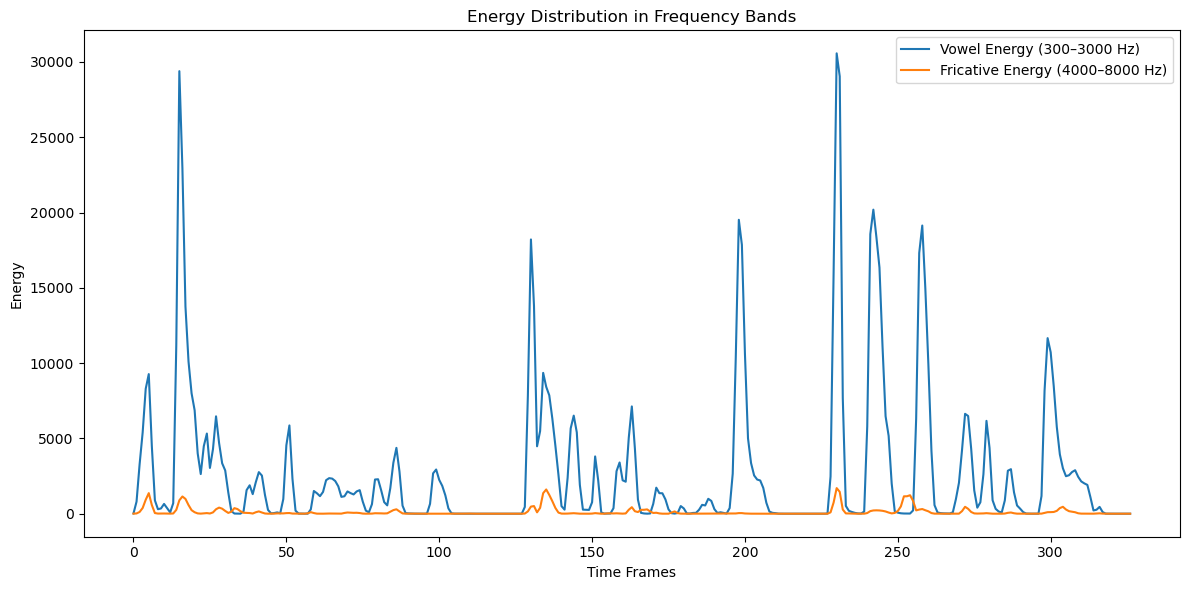

In [26]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Visualize Speech Signal
file_path = "LJ037-0171 (1).wav"
signal, sample_rate = librosa.load(file_path, sr=None)

# Visualize the waveform
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Speech Signal Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Compute and visualize the spectrogram
stft_result = librosa.stft(signal)
stft_magnitude = np.abs(stft_result)
stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.subplot(2, 1, 2)
librosa.display.specshow(stft_db, sr=sample_rate, x_axis="time", y_axis="log", hop_length=512)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

# Step 2: Compute Energy in Different Frequency Bands
def compute_energy_in_band(signal, sample_rate, low_freq, high_freq):
    # Compute STFT
    stft_result = librosa.stft(signal)
    stft_magnitude = np.abs(stft_result)
    
    # Convert frequency bins to Hz
    frequencies = librosa.fft_frequencies(sr=sample_rate, n_fft=stft_result.shape[0])
    
    # Find indices corresponding to the frequency band
    band_indices = np.where((frequencies >= low_freq) & (frequencies <= high_freq))[0]
    
    # Compute energy in the band
    energy = np.sum(stft_magnitude[band_indices, :] ** 2, axis=0)
    return energy

# Energy for vowels (low-frequency band: 300–3000 Hz)
vowel_energy = compute_energy_in_band(signal, sample_rate, 300, 3000)

# Energy for fricatives (high-frequency band: 4000–8000 Hz)
fricative_energy = compute_energy_in_band(signal, sample_rate, 4000, 8000)

# Step 3: Compute Energy Ratio
energy_ratio = np.mean(vowel_energy) / np.mean(fricative_energy)
print(f"Energy Ratio (Vowels/Fricatives): {energy_ratio:.2f}")

# Plot Energy Distribution
plt.figure(figsize=(12, 6))
plt.plot(vowel_energy, label="Vowel Energy (300–3000 Hz)")
plt.plot(fricative_energy, label="Fricative Energy (4000–8000 Hz)")
plt.title("Energy Distribution in Frequency Bands")
plt.xlabel("Time Frames")
plt.ylabel("Energy")
plt.legend()
plt.tight_layout()
plt.show()